In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression

# read in responses

df = pd.read_csv('Statistics Data Collection (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,"After a long day of school, your friend surprises you with one of the candies below. Which are you more excited to receive?",How delighted would you be to receive a piece of this candy?,How delighted would you be to receive a piece of this candy?.1,Your roomate leaves a note on the mirror that they left you candy on your desk. Which are you more excited to receive?,How delighted would you be to receive a pack of this candy?,How delighted would you be to receive a pack of this candy?.1,There's a bowl of candy on the table when you walk into class. Which are you more excited to receive?,How delighted would you be to receive a piece of this candy?.2,How delighted would you be to receive a piece of this candy?.3
0,11/9/2023 15:41:42,Option 2,3,4,Option 2,4,5,Option 2,5,4
1,11/9/2023 15:41:54,Option 2,4,5,Option 1,5,4,Option 2,1,1
2,11/9/2023 15:42:15,Option 2,2,3,Option 1,2,1,Option 2,2,2
3,11/9/2023 15:42:18,Option 1,3,3,Option 1,4,3,Option 1,3,4
4,11/9/2023 15:42:31,Option 1,3,3,Option 2,2,4,Option 1,3,4


In [147]:
# renaming column lables for easier legibility
# each grouping of questions is a batch, denoted B1, B2, B3
# each question within a batch is denoted Q1, Q2, Q3, with Q1 representing the choice between two images and 
#     Q2, Q3 representing the follow up questions

column_names = ['Timestamp', 'B1Q1', 'B1Q2', 'B1Q3', 'B2Q1', 'B2Q2', 'B2Q3', 'B3Q1', 'B3Q2', 'B3Q3']
df.columns = column_names
df.head()

,Timestamp,B1Q1,B1Q2,B1Q3,B2Q1,B2Q2,B2Q3,B3Q1,B3Q2,B3Q3
0,11/9/2023 15:41:42,Option 2,3,4,Option 2,4,5,Option 2,5,4
1,11/9/2023 15:41:54,Option 2,4,5,Option 1,5,4,Option 2,1,1
2,11/9/2023 15:42:15,Option 2,2,3,Option 1,2,1,Option 2,2,2
3,11/9/2023 15:42:18,Option 1,3,3,Option 1,4,3,Option 1,3,4
4,11/9/2023 15:42:31,Option 1,3,3,Option 2,2,4,Option 1,3,4


In [148]:
# Cleaning data so Option 1 is stored as 1 and Option 2 is stored as 2

df.replace(to_replace='Option 1', value=1, inplace=True)
df.replace(to_replace='Option 2', value=2, inplace=True)
df.head()


,Timestamp,B1Q1,B1Q2,B1Q3,B2Q1,B2Q2,B2Q3,B3Q1,B3Q2,B3Q3
0,11/9/2023 15:41:42,2,3,4,2,4,5,2,5,4
1,11/9/2023 15:41:54,2,4,5,1,5,4,2,1,1
2,11/9/2023 15:42:15,2,2,3,1,2,1,2,2,2
3,11/9/2023 15:42:18,1,3,3,1,4,3,1,3,4
4,11/9/2023 15:42:31,1,3,3,2,2,4,1,3,4


In [149]:
# removing the timestamp column as it is not needed for analysis

df.drop(labels='Timestamp', axis=1, inplace=True)
df.head()

,B1Q1,B1Q2,B1Q3,B2Q1,B2Q2,B2Q3,B3Q1,B3Q2,B3Q3
0,2,3,4,2,4,5,2,5,4
1,2,4,5,1,5,4,2,1,1
2,2,2,3,1,2,1,2,2,2
3,1,3,3,1,4,3,1,3,4
4,1,3,3,2,2,4,1,3,4


In [150]:
# NOTES
# B1Q1: Option 2 is the orange option (other is blue)
# B2Q1: Option 1 is the red option (other is purple)
# B3Q1: Option 2 is the red option (other is blue)

In [151]:
df.describe()

,B1Q1,B1Q2,B1Q3,B2Q1,B2Q2,B2Q3,B3Q1,B3Q2,B3Q3
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1.746667,3.693333,3.986667,1.426667,3.613333,3.333333,1.760000,4.013333,3.493333
std,0.437849,1.065089,1.084203,0.497924,1.184281,1.297954,0.429959,1.084203,1.201051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.500000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,2.000000,4.000000,4.000000,1.000000,4.000000,3.000000,2.000000,4.000000,4.000000
75%,2.000000,5.000000,5.000000,2.000000,5.000000,4.500000,2.000000,5.000000,4.500000
max,2.000000,5.000000,5.000000,2.000000,5.000000,5.000000,2.000000,5.000000,5.000000


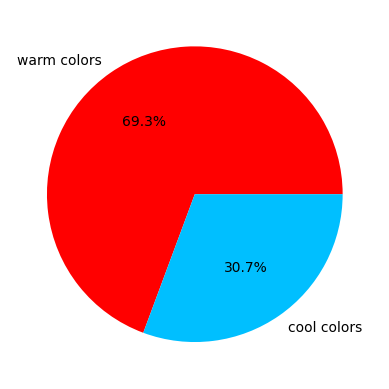

In [152]:
question_1_columns_df = df[['B1Q1','B2Q1','B3Q1']]
warm_colors = question_1_columns_df['B1Q1'].value_counts()[2] + question_1_columns_df['B2Q1'].value_counts()[1] + question_1_columns_df['B3Q1'].value_counts()[2]
cool_colors = question_1_columns_df['B1Q1'].value_counts()[1] + question_1_columns_df['B2Q1'].value_counts()[2] + question_1_columns_df['B3Q1'].value_counts()[1]
wedges = [warm_colors, cool_colors]
labels = ['warm colors', 'cool colors']
colors = ['#ff0000', '#00BFFF']
plt.pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [153]:
# Shapiro-Wilk tests on underlying distributions of Q2 and Q3 for each batch

# BLUE
B1Q2_data = df[['B1Q2']]
print(shapiro(B1Q2_data))
# statistic = 0.881937563419342, pvalue=4.242994691594504e-06

# ORANGE
B1Q3_data = df[['B1Q3']]
print(shapiro(B1Q3_data))
# statistic = 0.8253223896026611, pvalue=5.5495906536862094e-08

# RED
B2Q2_data = df[['B2Q2']]
print(shapiro(B2Q2_data))
# statistic = 0.8752654790878296, pvalue=2.4090297756629298e-06

# PURPLE
B2Q3_data = df[['B2Q3']]
print(shapiro(B2Q3_data))
# statistic = 0.8950105905532837, pvalue=1.3563113498094026e-05

# RED
B3Q2_data = df[['B3Q2']]
print(shapiro(B3Q2_data))
# statistic = 0.8194859623908997, pvalue=3.734770359642425e-08

# BLUE
B3Q3_data = df[['B3Q3']]
print(shapiro(B3Q3_data))
# statistic = 0.8945674896240234, pvalue=1.3023294741287827e-05)

# The Shapiro-Wilk tests indicate that none of the Q2 and Q3 responses are normally distributed
# the p value is less than 0.05 for each of them, meaning we reject the null hypothesis


ShapiroResult(statistic=0.881937563419342, pvalue=4.242994691594504e-06)
ShapiroResult(statistic=0.8253223896026611, pvalue=5.5495906536862094e-08)
ShapiroResult(statistic=0.8752654790878296, pvalue=2.4090297756629298e-06)
ShapiroResult(statistic=0.8950105905532837, pvalue=1.3563113498094026e-05)
ShapiroResult(statistic=0.8194859623908997, pvalue=3.734770359642425e-08)
ShapiroResult(statistic=0.8945674896240234, pvalue=1.3023294741287827e-05)


In [154]:
# The underlying data is not normally distributed, and the same population answered both Q2 and Q3
# Wilcoxon Signed-Rank Test

# Blue, Orange, Red, Purple, Red, Blue
# Ha: B1Q3_data will be better
print(scipy.stats.wilcoxon(B1Q2_data,B1Q3_data, alternative='less'))
# pvalue = 0.00549416 (Significant, Reject Null Hypothesis)

# Ha: B2Q2_data will be better
print(scipy.stats.wilcoxon(B2Q2_data,B2Q3_data, alternative='greater'))
# pvalue = 0.05520777 (Not Significant, Fail to Reject Null Hypothsis)

# Ha: B3Q2_data will be better
print(scipy.stats.wilcoxon(B3Q2_data,B3Q3_data, alternative='greater'))
# pvalue = 0.00011385 (Significant, Reject Null Hypothesis)

WilcoxonResult(statistic=array([244.]), pvalue=array([0.00549416]))
WilcoxonResult(statistic=array([1021.]), pvalue=array([0.05520777]))
WilcoxonResult(statistic=array([734.]), pvalue=array([0.00011385]))


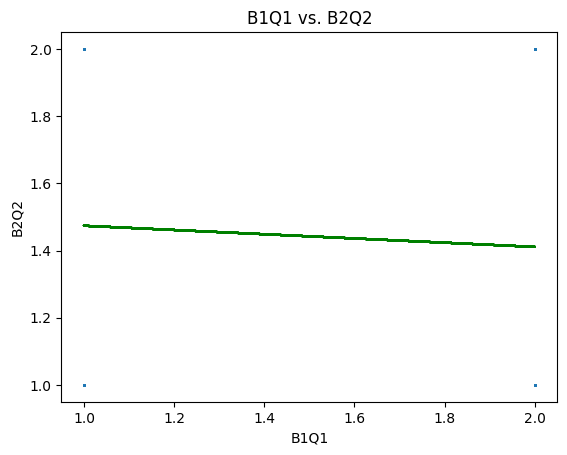

In [155]:
# What is the relationship between the blue and purple alternative candy colors?
# Linear Regression model to predict likelihood of choosing red candy bover purple based on choosing orange/red over blue
# Linear Regression model to predict likelihood of choosing purple candy over red based on choosing blue over orange/red

# THIS DID NOT TURN OUT
lr = LinearRegression()
X = df['B1Q1'].to_numpy().reshape(-1,1)
y = df['B2Q1']
lr.fit(X,y)

predicted = lr.predict(X)

plt.scatter(df["B1Q1"],df["B2Q1"], s=1)
plt.plot(df["B1Q1"], predicted, color='green')
plt.title("B1Q1 vs. B2Q2")
plt.xlabel("B1Q1")
plt.ylabel("B2Q2")
plt.show()

In [156]:
# I want to see why the red/purple split was not as distinct as the orange/blue and red/blue split.
# I want to see if the people who answered red/orange for the blues also answered red for the red/purple

# B1Q1: Option 2 is the orange option (other is blue)
# B2Q1: Option 1 is the red option (other is purple)
# B3Q1: Option 2 is the red option (other is blue)

# If I do question 1 minus question 2, that will be the further away from 0 it is, the more people 
# who vote consistently with orange/red
# If I do (question 1 + question 3) / 2, that gives how many people voted red/orange
# then, if I subtract question 2, the further away from 0 it is the more consistently people voted


print(((df['B1Q1'] + df['B3Q1']) / 2).sum() / len(df['B1Q1']))
# Result: 1.75
# This means that 6/8 votes were for red/orange
# If we know that 75% of votes were for orange in B1
# and we know that 74% of votes were for red in B3
# then up to 50% of people did not vote consistently
consistency_of_votes_df = ((df['B1Q1'] + df['B3Q1']) / 2) - df['B2Q1']
consistency_of_votes = consistency_of_votes_df.value_counts() / len(consistency_of_votes_df)
print(consistency_of_votes)
# Result: 0.32666666666666666
# This means that 

# VOTING ORANGE FOR B1 AND RED FOR B2
consistency_of_votes_B1_df = (df['B1Q1']) - df['B2Q1']
consistency_of_votes_B1 = consistency_of_votes_B1_df.value_counts() / len(consistency_of_votes_B1_df)
print(consistency_of_votes_B1)
# Results:  0    0.44
#           1    0.44
#          -1    0.12
# 1 means they voted orange then red
# 0 means they voted orange then purple or blue then red
# -1 means they voted blue then purple

# VOTING RED FOR B3 AND RED FOR B2
consistency_of_votes_B3_df = (df['B3Q1']) - df['B2Q1']
consistency_of_votes_B3 = consistency_of_votes_B3_df.value_counts() / len(consistency_of_votes_B3_df)
print(consistency_of_votes_B3)
# Results: 0    0.44
#          1    0.44
#         -1    0.12
# 1 means they voted red then red
# 0 means they voted red then purple or blue then red
# -1 means they voted blue then purple
# if 24% of people voted blue on B3, and 12% voted blue then purple, then 12% of people voted blue then red.
# that means that of the 44% who voted red then purple or blue then red, 32% voted red then purple.

# VOTING ORANGE FOR B1 AND RED FOR B3. In this case, closer to 0 is more consistent.
consistency_of_votesA_df = df['B1Q1']- df['B3Q1']
consistency_of_votesA = consistency_of_votesA_df.value_counts() / len(consistency_of_votesA_df)
print(consistency_of_votesA)
# Results: 0    0.693333
#         -1    0.160000
#          1    0.146667
# This means that people who voted for Orange in B1 also very consistently voted for Red in B3.

1.7533333333333334
 1.0    0.413333
 0.0    0.240000
-0.5    0.200000
 0.5    0.106667
-1.0    0.040000
Name: count, dtype: float64
 0    0.44
 1    0.44
-1    0.12
Name: count, dtype: float64
 1    0.493333
 0    0.346667
-1    0.160000
Name: count, dtype: float64
 0    0.693333
-1    0.160000
 1    0.146667
Name: count, dtype: float64


In [157]:
# On previous point, want to see whether or not people voted consistenly on B1 and B3. Up to 50% did not vote consistently
# but what percentage/ how many people actually did?
# this is either -1, 0, or 1, where 0 is a consistent vote and -1 and 1 are not consistent votes
vote_consistency_df = df['B1Q1'] - df['B3Q1']
print(vote_consistency_df.value_counts()/len(vote_consistency_df))
# Results: 0    0.693333
# This means that 70% of respondants voted consistently orange on B1 and red on B2. 

 0    0.693333
-1    0.160000
 1    0.146667
Name: count, dtype: float64
